In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)

In [ ]:
y.shape

(150, 3, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder # not needed as well
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])

In [ ]:
data['species'].unique()

array([0, 1, 2])

In [ ]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
X=data.drop(['species'],axis=1).values
y=data['species'].values

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#fearture scaling  # not needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
train_y = to_categorical(train_y, num_classes=3)
test_y = to_categorical(test_y, num_classes=3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(train_X.shape[1],)))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                250       
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1873 (7.32 KB)
Trainable params: 1873 (7.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy']) # can be replaced manually


In [ ]:
from keras.callbacks import EarlyStopping # batch size dec.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_X, train_y, validation_split=0.1, batch_size=32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 1s 235ms/step - loss: 0.8864 - accuracy: 0.5000 - val_loss: 0.9990 - val_accuracy: 0.2500
Epoch 2/100
4/4 [==============================] - 0s 59ms/step - loss: 0.8615 - accuracy: 0.5093 - val_loss: 0.9781 - val_accuracy: 0.2500
Epoch 3/100
4/4 [==============================] - 0s 66ms/step - loss: 0.8385 - accuracy: 0.5185 - val_loss: 0.9600 - val_accuracy: 0.2500
Epoch 4/100
4/4 [==============================] - 0s 48ms/step - loss: 0.8181 - accuracy: 0.5278 - val_loss: 0.9412 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 39ms/step - loss: 0.7990 - accuracy: 0.5463 - val_loss: 0.9256 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 74ms/step - loss: 0.7809 - accuracy: 0.5278 - val_loss: 0.9116 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 63ms/step - loss: 0.7653 - accuracy: 0.5741 - val_loss: 0.8989 - val_accuracy: 0.3333
Epoch 8/100
4/4 [==

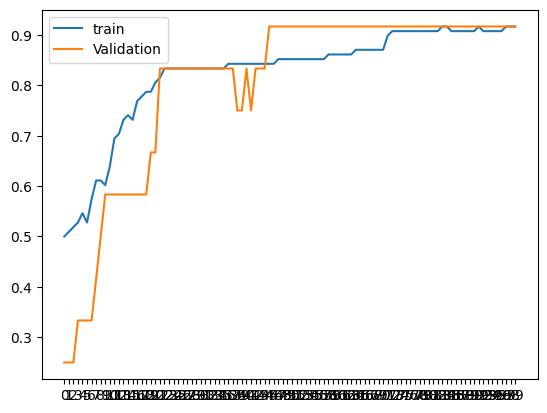

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xticks(np.arange(100))
plt.legend()
plt.show()